In [1]:
from __future__ import print_function, division
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from platform import python_version

print(python_version())


3.6.8


### lets try to plot sine and cosine graph using matplot lib

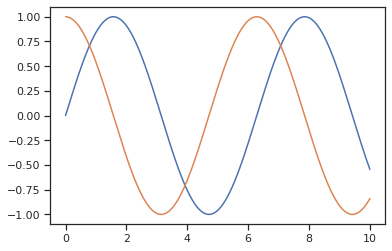

In [210]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x),x,np.cos(x))


### Lets set seaborn environment and redo the plotting

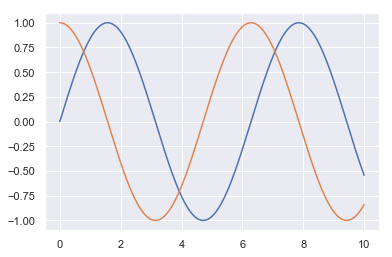

In [64]:
sb.set()
plt.plot(x,np.sin(x),x,np.cos(x))

#### What do you think about two plots. Yep, just by settting the seaborn envionment makes plot much better. Lets explore other features as well. 

### Let us try using Histograms, KDE and Densities

In [12]:
#let us create a pandas dataframe
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size = 2000)
data = pd.DataFrame(data, columns= ['x', 'y'])

### Lets plot the histogram of X and Y

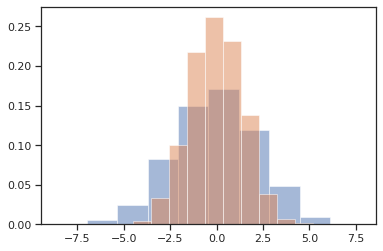

In [211]:
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

### Lets use seaborn to plot KDE

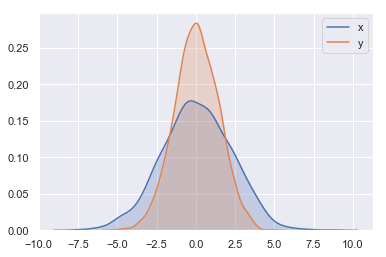

In [14]:
for col in 'xy':
    sb.kdeplot(data[col], shade=True)

### We can also plot KDE along with respective histogram

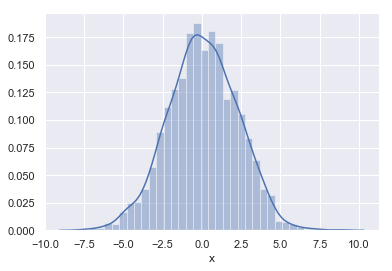

In [15]:
sb.distplot(data['x']);

### If we pass 2D dataset, we get 2D visulization of KDE


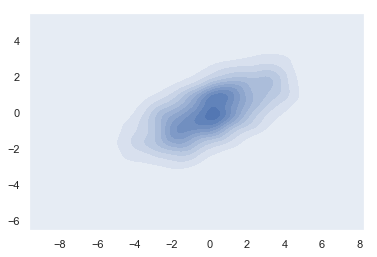

In [69]:
sb.kdeplot(data, shade=True)

## We can also plot marginal distribution together 

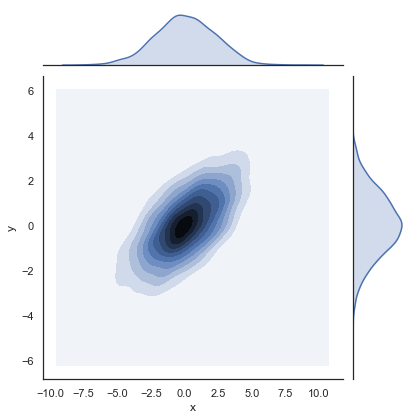

In [16]:
with sb.axes_style('white'):
    sb.jointplot("x", "y", data, kind="kde");

We can try other parameters in **joinplot** like **kind='hex'** to get hexagonally-based histogram

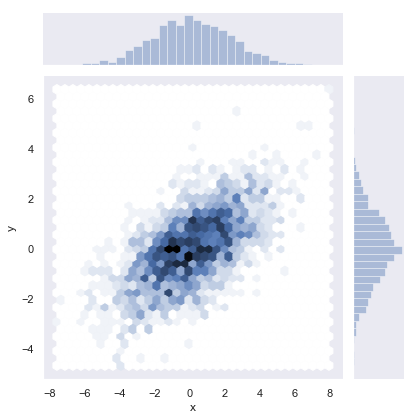

In [15]:
with sb.axes_style('dark'):
    sb.jointplot("x", "y", data, kind='hex')

The generalization version of joint plot for larger dimension dataset is *pair plots*. It is useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other

In [8]:
iris = sb.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


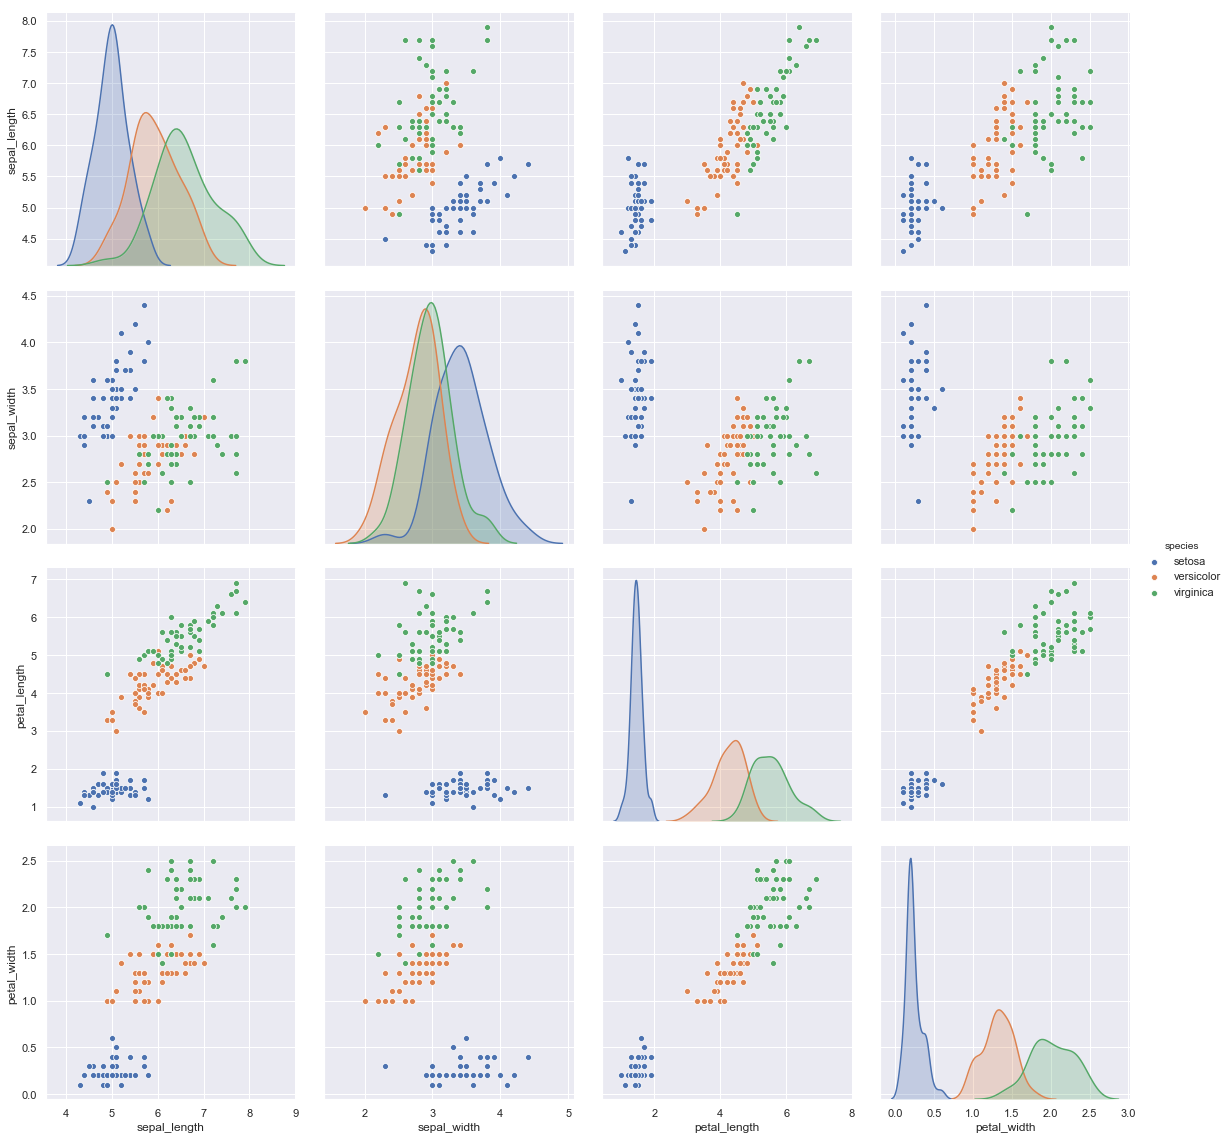

In [9]:
sb.pairplot(iris, hue = 'species', size=4)

Sometime best way to view data is via histogram of subsets. Seaborn's <span style="background-color: #FFFF00">FaceGrid</span> makes this extremely simple. 

In [10]:
tips = sb.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

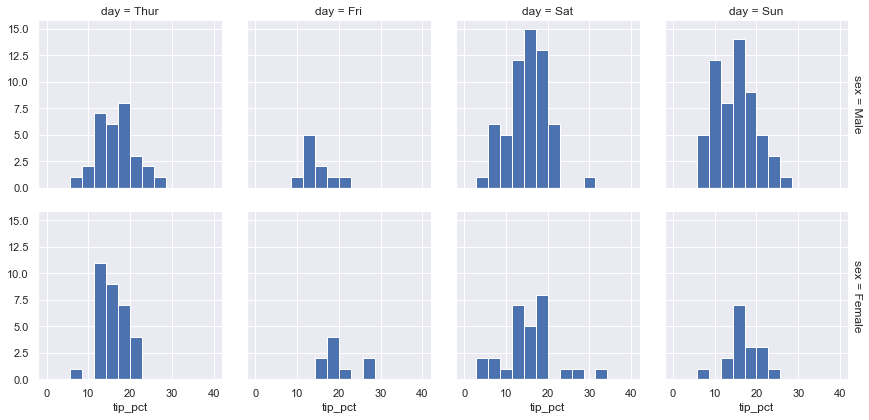

In [11]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sb.FacetGrid(tips, row="sex", col="day", margin_titles=True)
grid.map(plt.hist,'tip_pct', bins=np.linspace(0, 40, 15));

Cat Plot can be used to visualize this data as well. This allows you to view the distribution of a parameter within bins defined by any other parameter

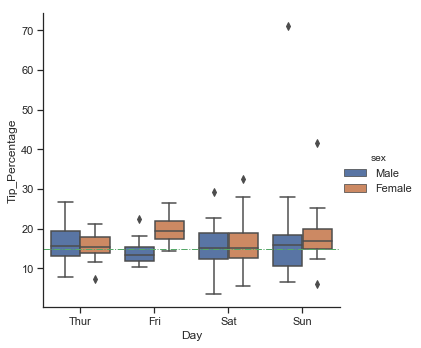

In [20]:
with sb.axes_style(style='ticks'):
    
    g = sb.catplot("day", "tip_pct", "sex", data=tips, kind="box")
    
    g.set_axis_labels("Day", "Tip_Percentage");
    ax = g.axes[0]
    plt.axhline(15,ls='-.',c='g', linewidth=1)
    
    

## Joint Distributions
Similar to the pairlot,we can use <span style="background-color: #FFFF00">sb.jointplot</span> to show the joint distribution between different datasets, along with associated marginal distribution

In [7]:
with sb.axes_style('white'):
    sb.jointplot("total_bill","tip",data=tips, kind='hex')
    sb.jointplot("total_bill","tip",data=tips, kind='reg')

NameError: name 'tips' is not defined

## Bar Plot
Time series can be plotted using <span style="background-color: #FFFF00">sb.factorplot</span>

In [22]:
planets = sb.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

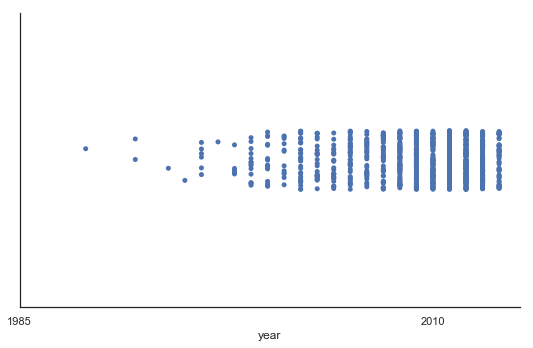

In [23]:
with sb.axes_style('white'):
    g = sb.catplot("year", data = planets, aspect=1.5)
    g.set_xticklabels(step=5)

## Visualizing Statistical Relationship
    1. relplot()
        a. scatterplot() (with kind="scatter", the default)
        b. lineplot() (with kind="line")
Here we will be dealing with numerical data. We will deal with categorical data later on.

In [92]:
sb.set(style="darkgrid")

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


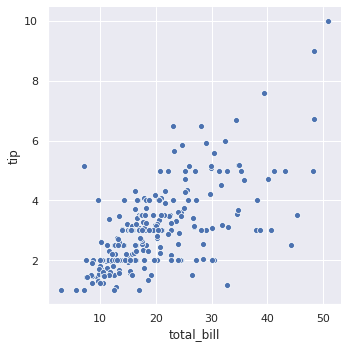

In [96]:

tips = sb.load_dataset("tips")
print(tips.head())
sb.relplot(x="total_bill",y="tip", data =tips)

## Lets try to plot data with 3 info. tip, total bill and sex

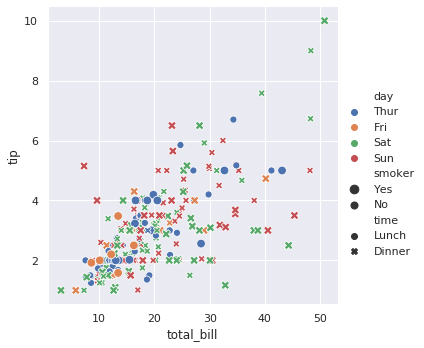

In [108]:
sb.relplot(x="total_bill", y="tip", hue="day",style="time", data=tips,size="smoker",sizes=(50,75) );

## Emphasizing continuity with line plots


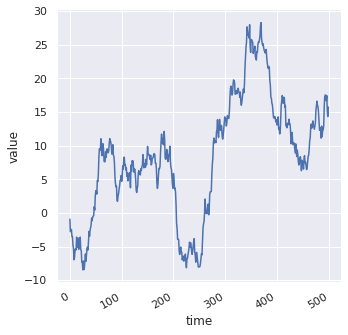

In [111]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sb.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()


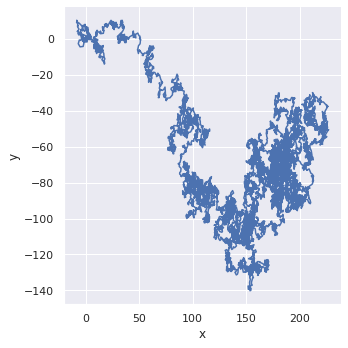

In [120]:
df = pd.DataFrame(np.random.randn(10000, 2).cumsum(axis=0), columns=["x", "y"])
sb.relplot(x="x", y="y", sort=False, kind="line", data=df);

## Aggregation and representing Uncertainty
More complex datasets will have multiple measurement for the same value of the <span style="color:blue">x</span> variable. The default behavior in seaborn is to aggregrate the multiple measurement at each ,<span style = "color:blue">x</span> value by plotting teh mean and the 95% confidence around the mean.

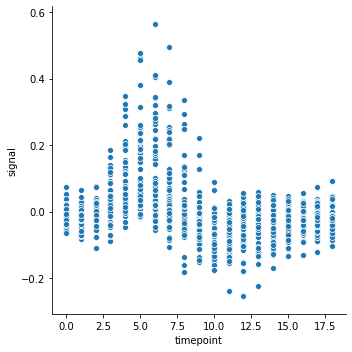

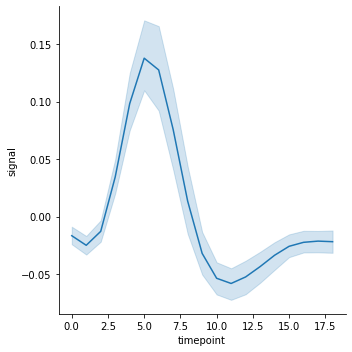

In [2]:
fmri = sb.load_dataset("fmri")
sb.relplot(x="timepoint", y="signal", kind="scatter", data=fmri);
sb.relplot(x="timepoint", y="signal", kind="line", data=fmri);

In [4]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

The confidence interval is computed usnig bootstrapping, which is time-intensive. So, we can disable them

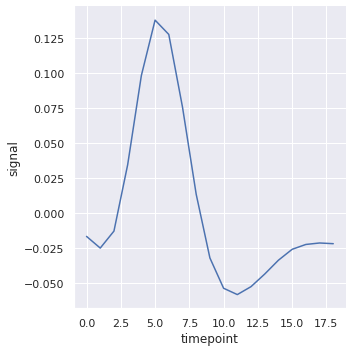

In [140]:
sb.relplot(x="timepoint",y="signal",ci=None,kind="line",data=fmri)

In [142]:
help(sb.relplot)

Help on function relplot in module seaborn.relational:

relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-specific options.

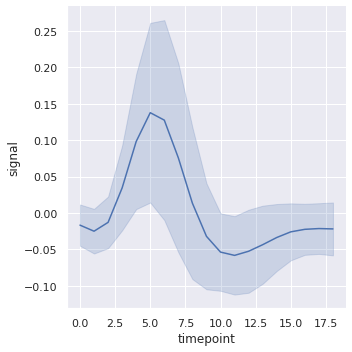

In [143]:
sb.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);


If we don want to take mean, we can turn off the aggregration together by setting <span style = "color:blue">estimator</span> parameter to <span style = "color:blue"> None </span>.

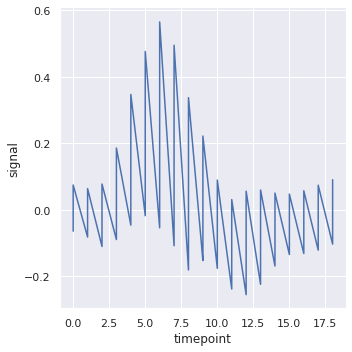

In [144]:
sb.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

Plotting different information in same line plot

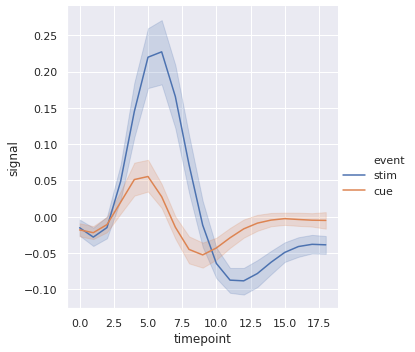

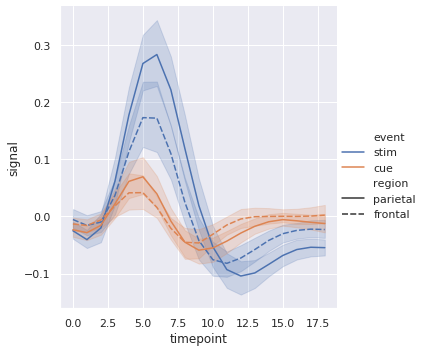

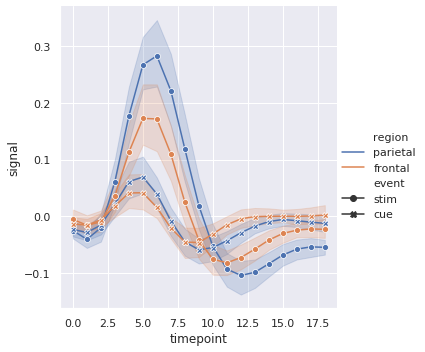

In [154]:
sb.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);
sb.relplot(x="timepoint", y="signal", hue="event", kind="line", style="region", data=fmri);
sb.relplot(x="timepoint", y="signal", hue="region", kind="line", style="event",data=fmri,\
           dashes=False,markers=True);

## Showing muliple relationship with facets

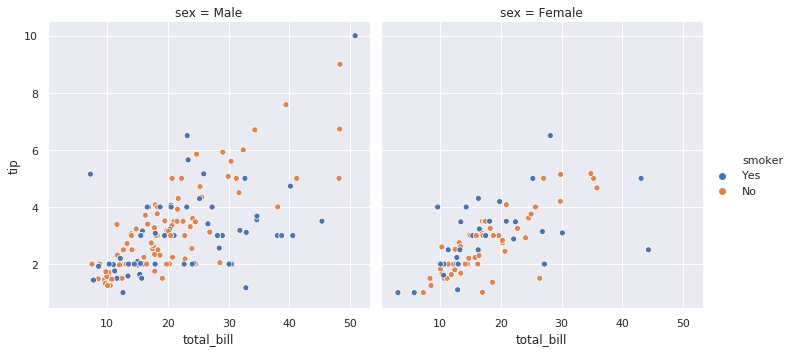

In [158]:
sb.relplot(x="total_bill", y="tip", hue="smoker",
            col="sex", data=tips);

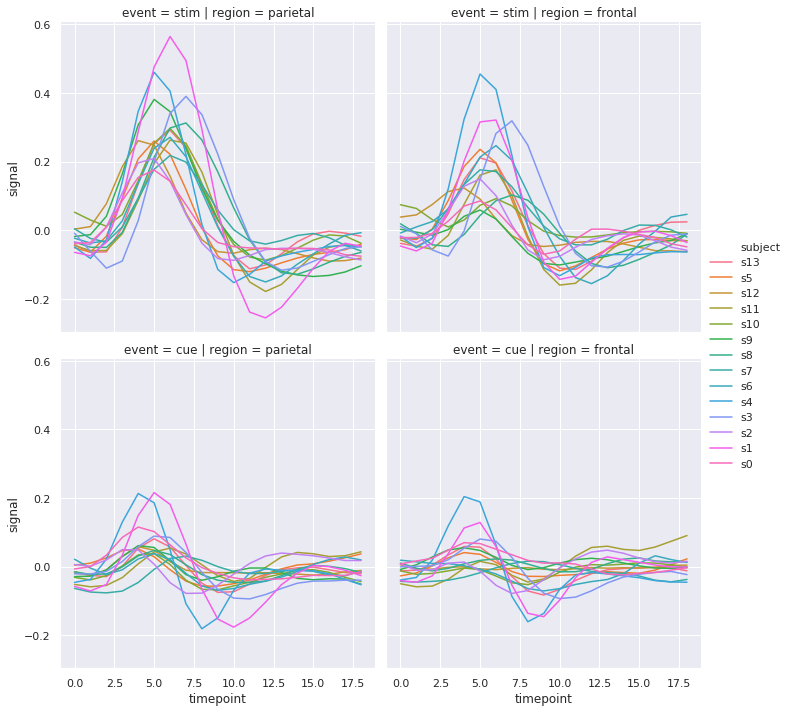

In [163]:
sb.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=5,
            kind="line", estimator=None, data=fmri);

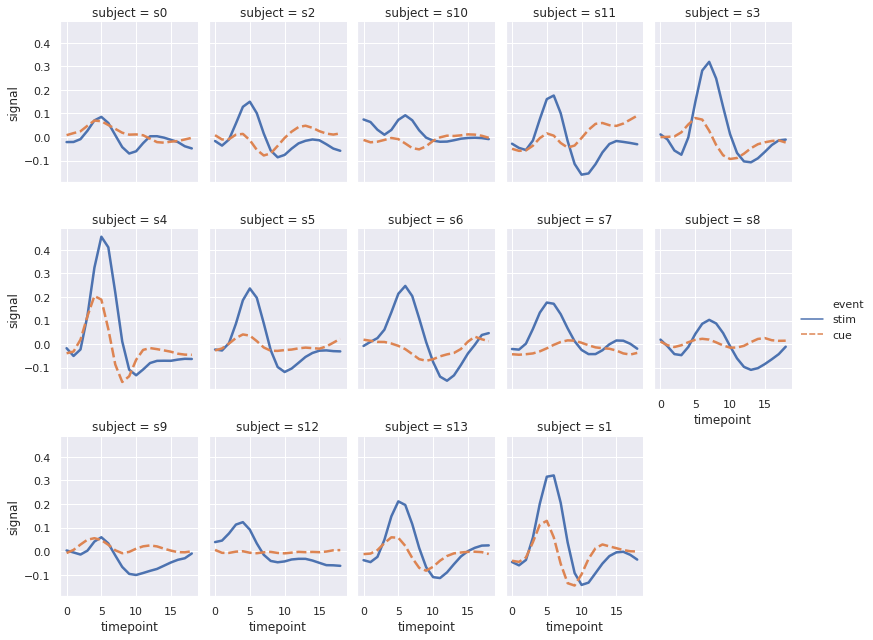

In [164]:
sb.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## Plotting with categorical data

For categorical data we use <span style="color:blue" > catplot </span>.
The different categorical plots are
    1. Categorical Scatterplots
        a. stripplot() (with kind="strip"; the default)
        b swarmplot() (with kind="swarm")
    2. Categorical distribution plots
        a. boxplot() (with kind = "box")
        b. violinplot() (with kind = "violin")
        c. boxenplot() (with kind = "boxen")
    3. Categorical estimate plots:
        a. pointplot() (with kind="point")
        b. barplot() (with kind="bar")
        c.countplot() (with kind="count")

In [24]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style="ticks", color_codes=True)



total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

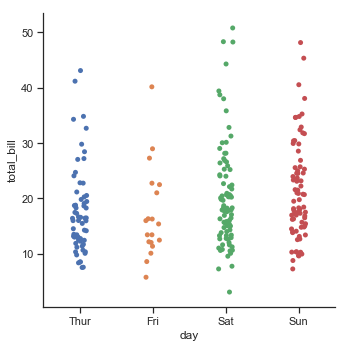

In [25]:
tips = sb.load_dataset("tips")
sb.catplot(x="day", y="total_bill", data=tips);
tips.head()

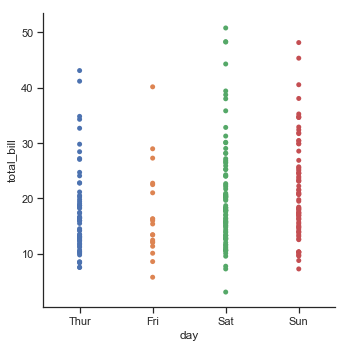

In [26]:
sb.catplot(x="day", y="total_bill", jitter=False, data=tips);

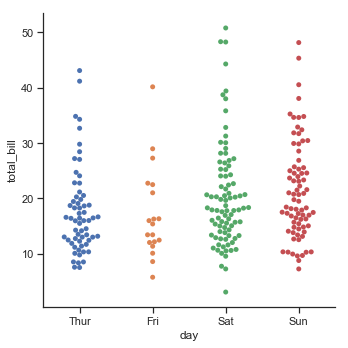

In [27]:
sb.catplot(x="day", y="total_bill", kind="swarm", data=tips);

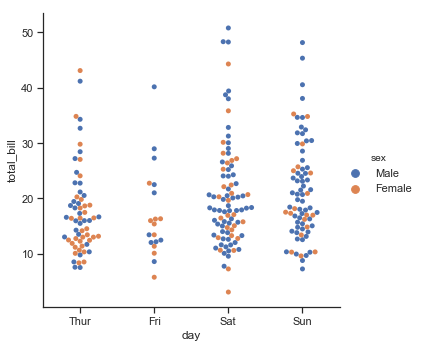

In [28]:
sb.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

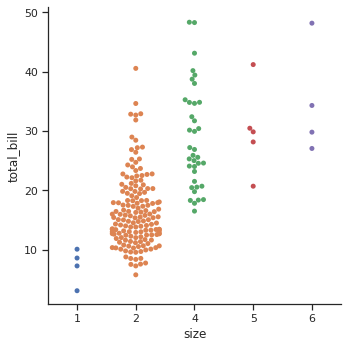

In [172]:
sb.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

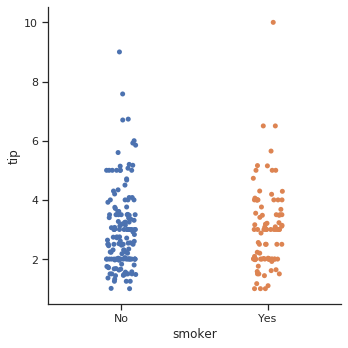

In [173]:
sb.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

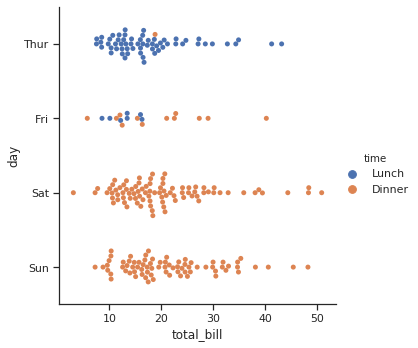

In [178]:
sb.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## Distribution of observations within categories

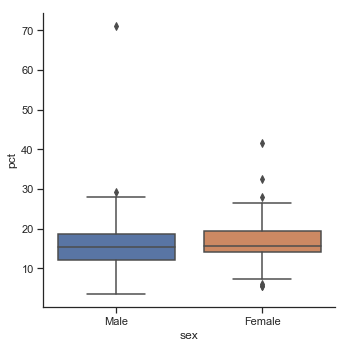

In [29]:
tips["pct"] = 100 * tips["tip"]/tips["total_bill"]
sb.catplot(x="sex", y="pct", kind="box", data=tips);

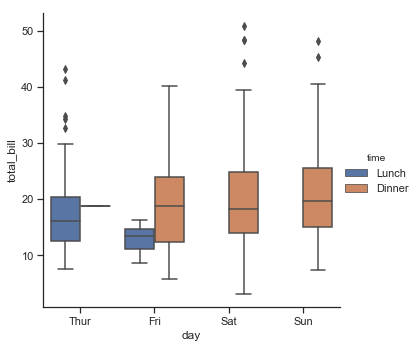

In [30]:
sb.catplot(x="day", y="total_bill", hue="time", kind="box", data=tips);

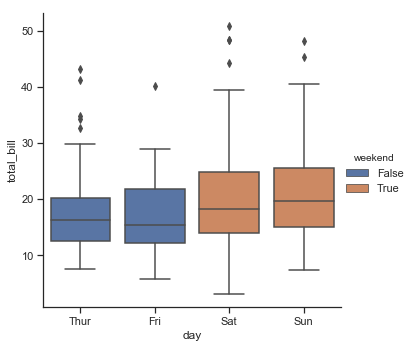

In [31]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sb.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

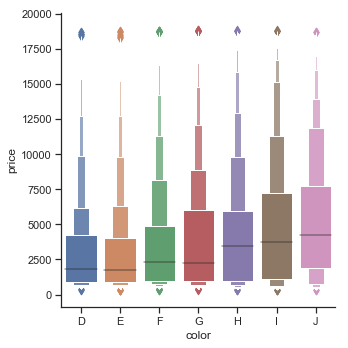

In [32]:
diamonds = sb.load_dataset("diamonds")
sb.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

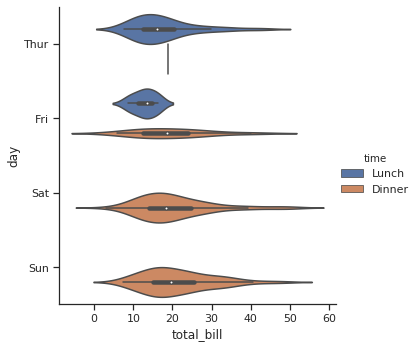

In [190]:
sb.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

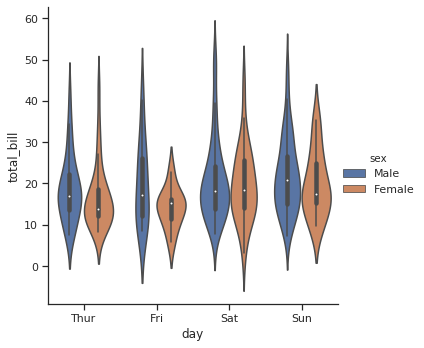

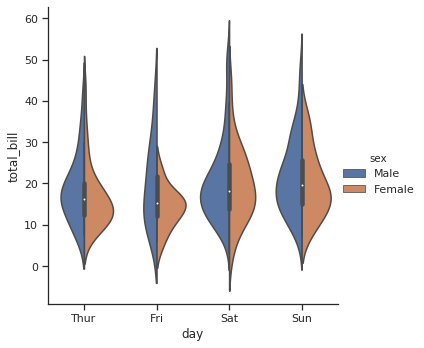

In [192]:
sb.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=False, data=tips);
sb.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

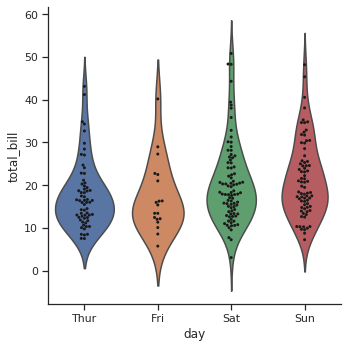

In [193]:


g = sb.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sb.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);



## Statistical Estimation within categories
#### Bar Plot

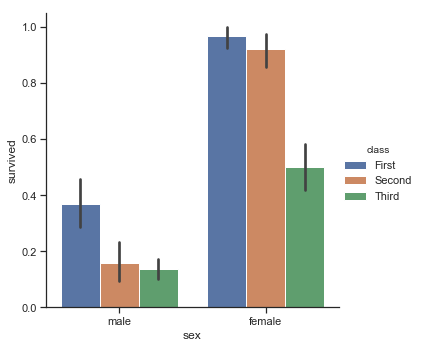

In [34]:
titanic = sb.load_dataset("titanic")
sb.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

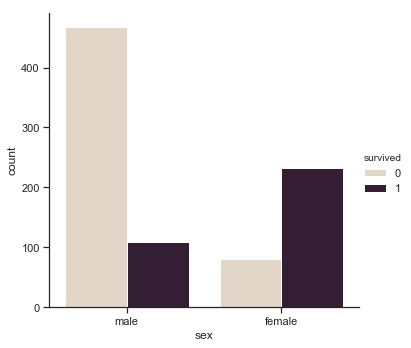

In [35]:
sb.catplot(x="sex", kind="count",hue="survived", palette="ch:.25", data=titanic);

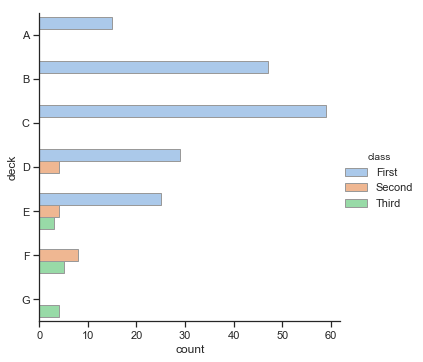

In [36]:
sb.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

### Point Plot

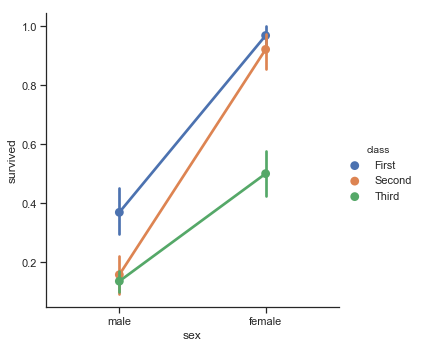

In [37]:
sb.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

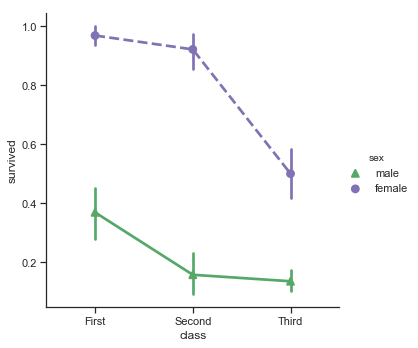

In [38]:
sb.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

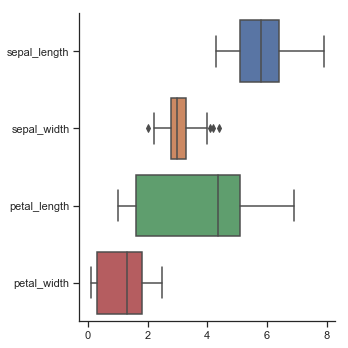

In [39]:
iris = sb.load_dataset("iris")
sb.catplot(data=iris, orient="h", kind="box");

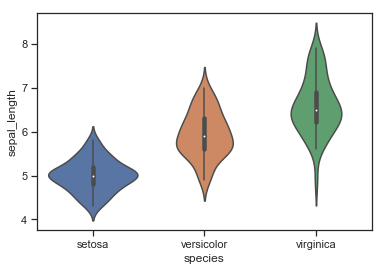

In [41]:
sb.violinplot(x=iris.species, y=iris.sepal_length);

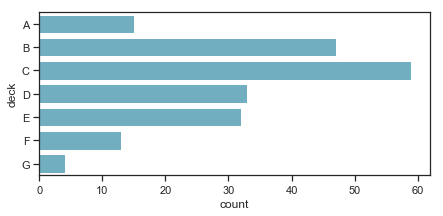

In [43]:
f, ax = plt.subplots(figsize=(7, 3))
sb.countplot(y="deck", data=titanic, color="c");

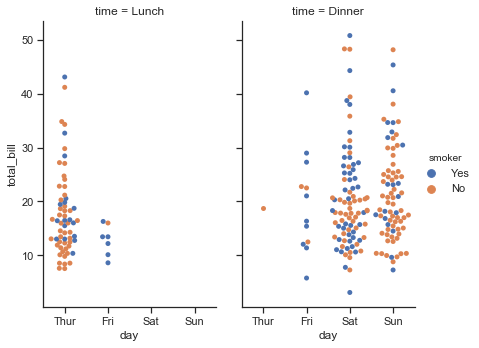

In [44]:
sb.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

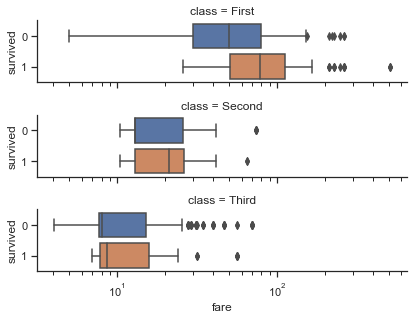

In [45]:
g = sb.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

### Visualizing the distribution of the data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
sb.set(color_codes=True)


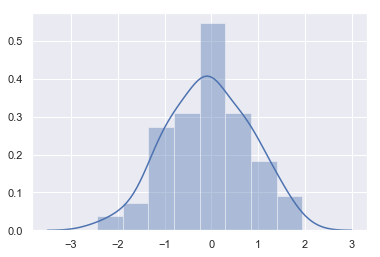

In [5]:
x = np.random.normal(size=100)
sb.distplot(x);

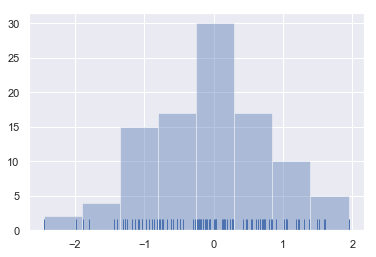

In [6]:
sb.distplot(x, kde=False, rug=True);

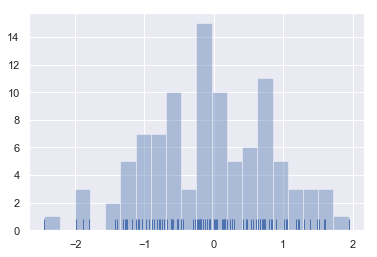

In [17]:
sb.distplot(x, bins=20, kde=False, rug=True);

The bandwidth <span style="color:blue"> bw </span> is the parameter that helps to decide how tigthly to fit the distribution with KDE.

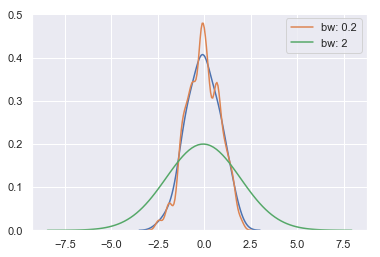

In [19]:
sb.kdeplot(x)
sb.kdeplot(x, bw=.2, label="bw: 0.2")
sb.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

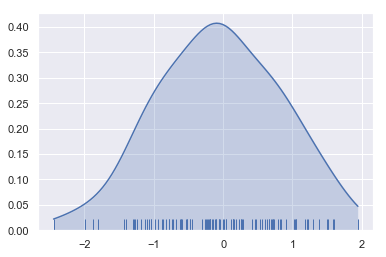

In [21]:
sb.kdeplot(x, shade=True, cut=0)
sb.rugplot(x);

## Fitting paramatric distribution

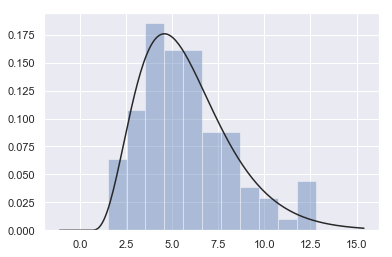

In [25]:
x = np.random.gamma(6, size=200)
sb.distplot(x, kde=False, fit=stats.gamma);

### Plotting bivariate distribution

In [26]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])


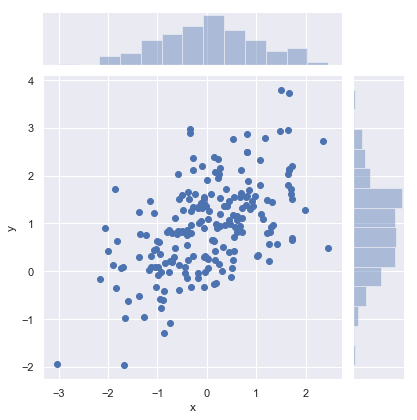

In [34]:
sb.jointplot(x="x", y="y", data=df);

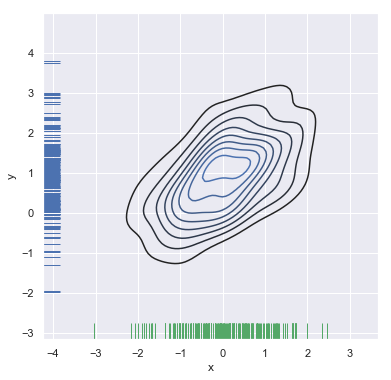

In [35]:
f, ax = plt.subplots(figsize=(6, 6))
sb.kdeplot(df.x, df.y, ax=ax)
sb.rugplot(df.x, color="g", ax=ax)
sb.rugplot(df.y, vertical=True, ax=ax);

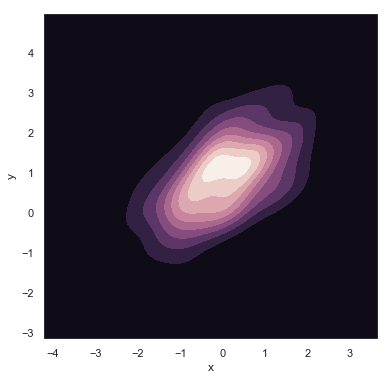

In [38]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sb.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sb.kdeplot(df.x, df.y, cmap=cmap, n_levels=10, shade=True);

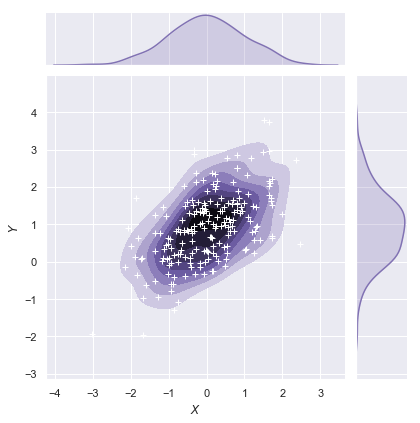

In [39]:
g = sb.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing Pairwise relationship

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


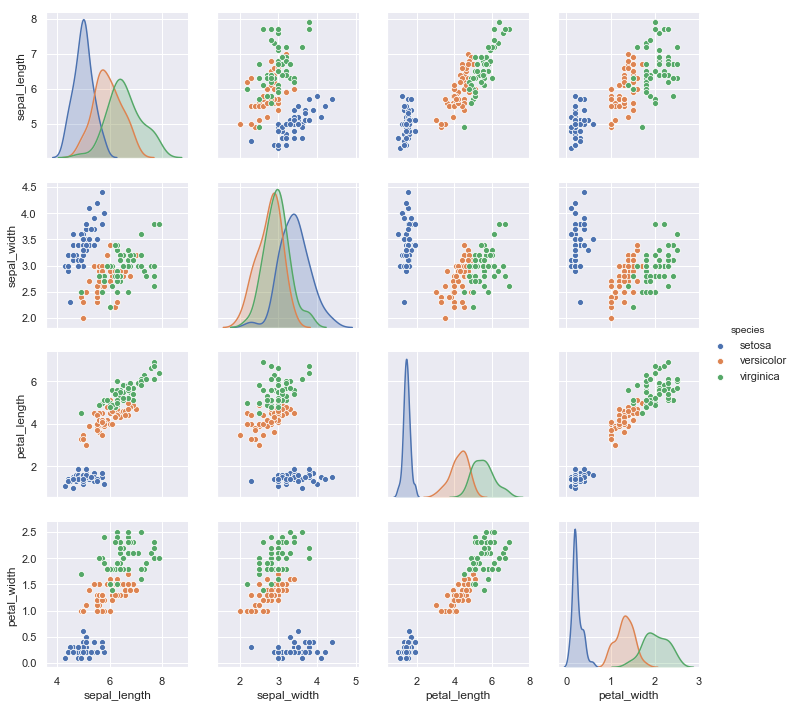

In [47]:
iris = sb.load_dataset("iris")
print(iris.head())
sb.pairplot(iris,hue='species')

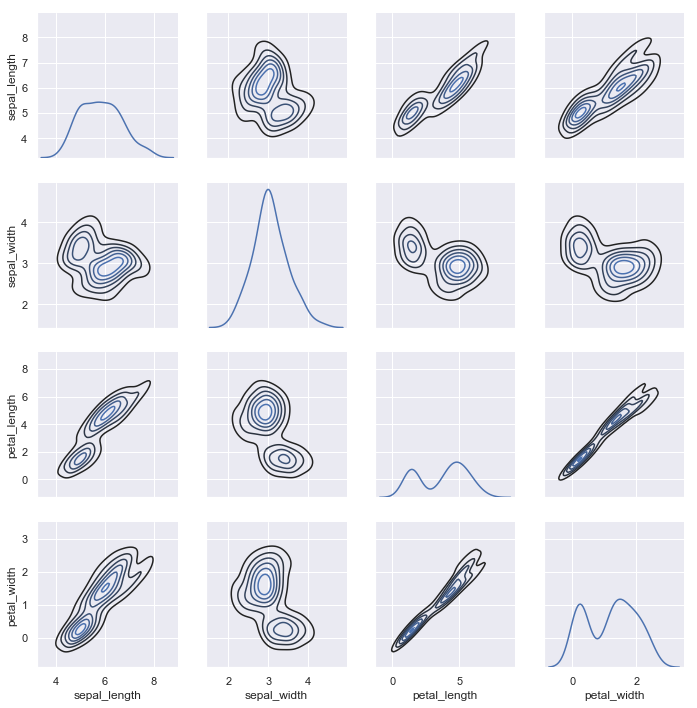

In [50]:
g = sb.PairGrid(iris)
g.map_diag(sb.kdeplot)
g.map_offdiag(sb.kdeplot, n_levels=6)

## Visualizing linear relationships

In [212]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [215]:
sb.set(color_codes=True)

In [216]:
tips = sb.load_dataset("tips")

Function that draws linear regression <span style="color:blue"> regplot()</span> and <span style="color:blue"> lmplot()</span>.

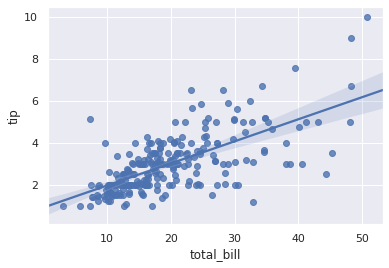

In [217]:
sb.regplot(x="total_bill", y="tip", data=tips);

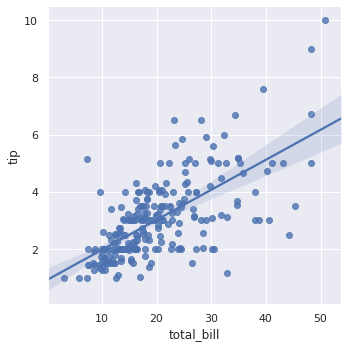

In [218]:
sb.lmplot(x="total_bill", y="tip", data=tips);

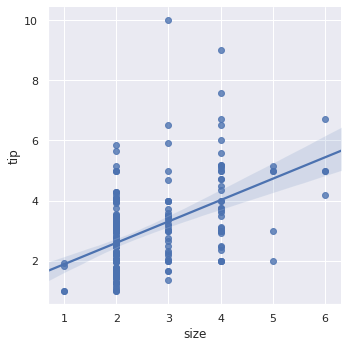

In [229]:
sb.lmplot(x="size", y="tip", data=tips);

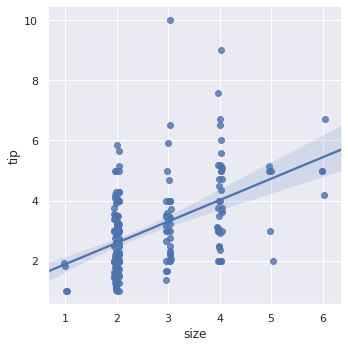

In [230]:
sb.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

For the discrete data set we can also plot the mean and its error.

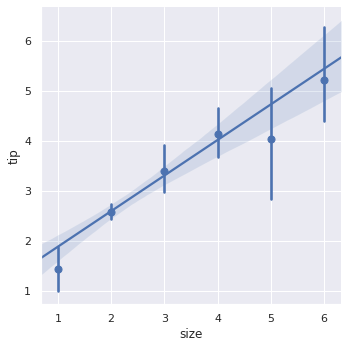

In [231]:
sb.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

We can also fit different kind of models

In [234]:
anscombe = sb.load_dataset("anscombe")
anscombe.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

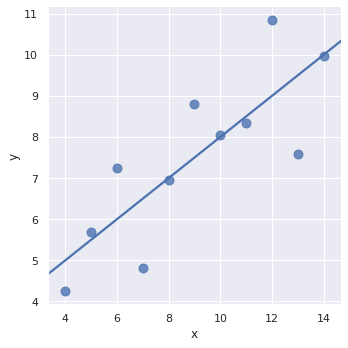

In [233]:
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

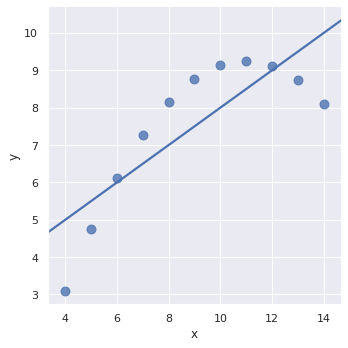

In [235]:
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

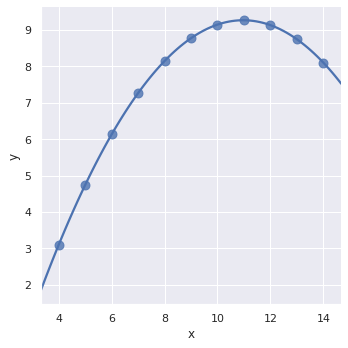

In [236]:
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

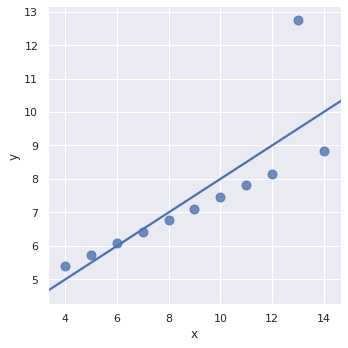

In [237]:
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

If there are outliers its good to fit robust fitting, which uses different loss funciton to downweight relatively large residuals.

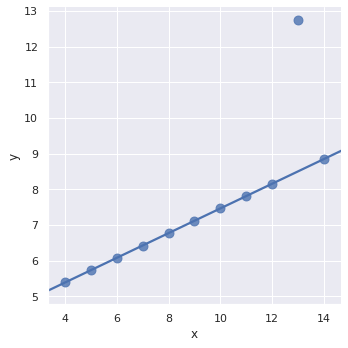

In [239]:
sb.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

If y variable is binary simple linear regression can be used but its not good fit

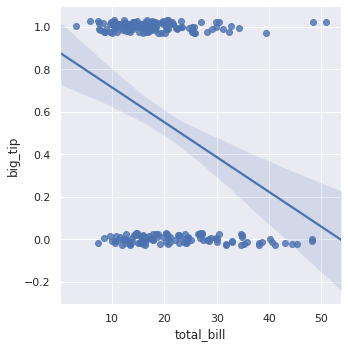

In [240]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sb.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

We can fit logistic regression

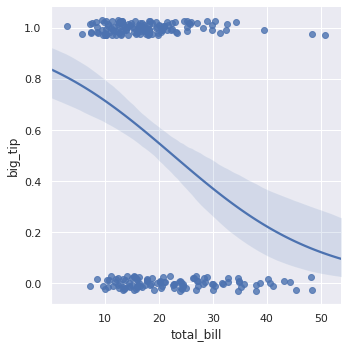

In [241]:
sb.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Doing local regression

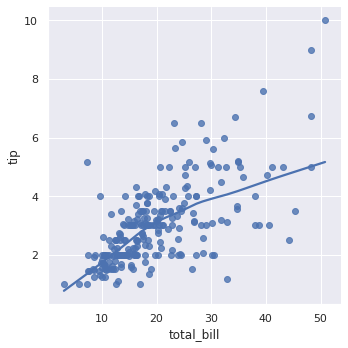

In [244]:
sb.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

Residue plot

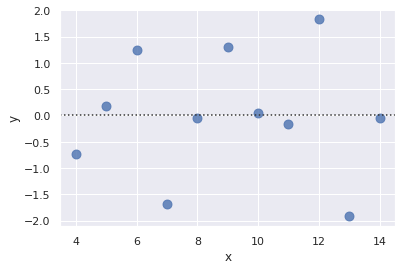

In [246]:
sb.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

Note: If there are structure in residue then the fit function is not appropriate

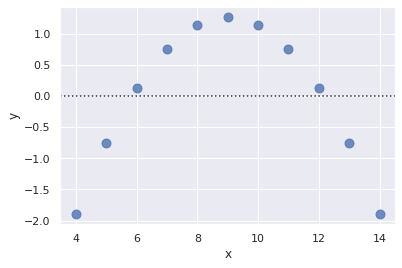

In [248]:
sb.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

### Conditioning on other variable

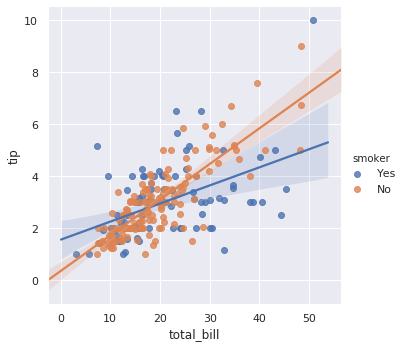

In [249]:
sb.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

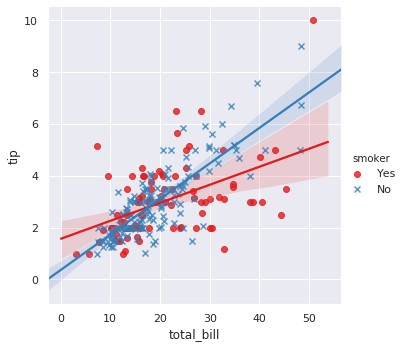

In [250]:
sb.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

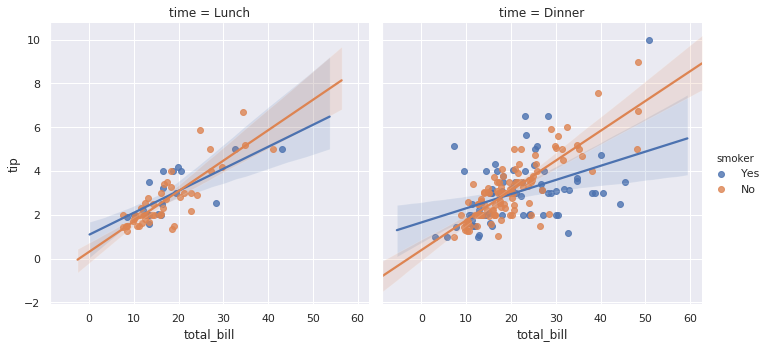

In [251]:
sb.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

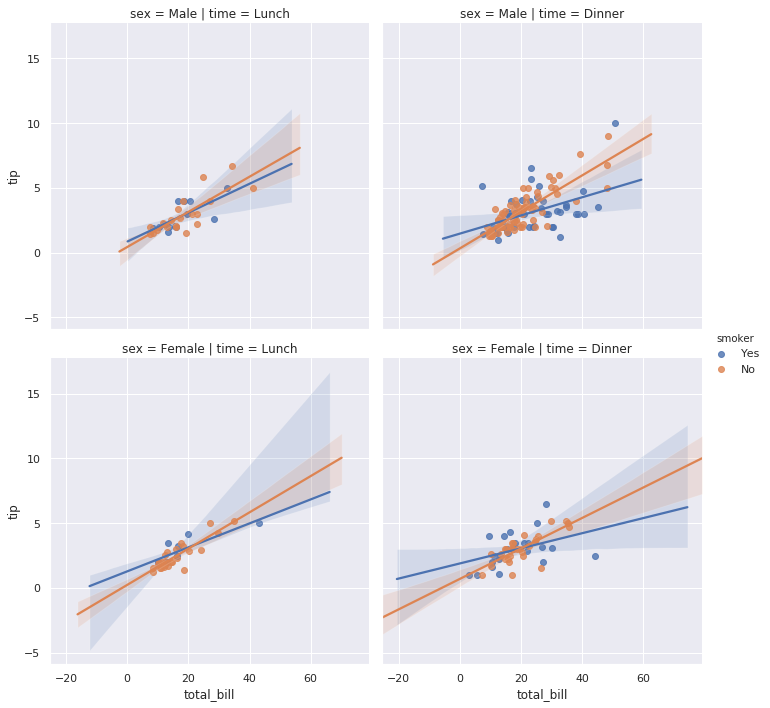

In [252]:
sb.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

### Controlling the size and shape of the plot

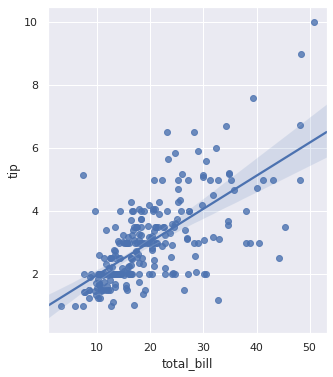

In [253]:
f, ax = plt.subplots(figsize=(5, 6))
sb.regplot(x="total_bill", y="tip", data=tips, ax=ax);

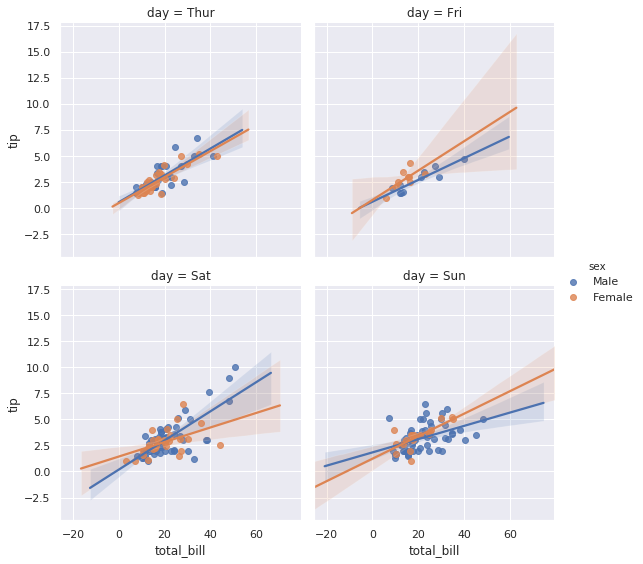

In [260]:
sb.lmplot(x="total_bill", y="tip", col="day",hue="sex", data=tips,
           col_wrap=2, height=4);

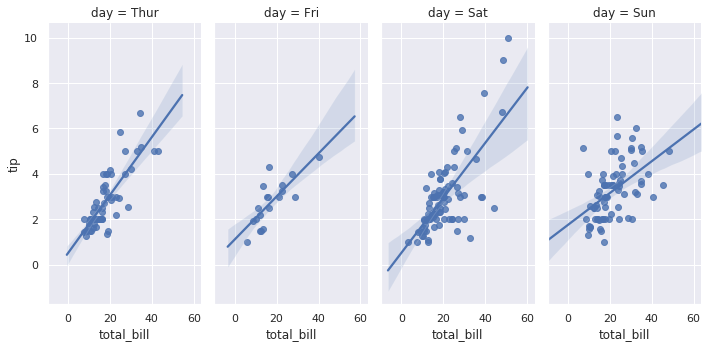

In [258]:
sb.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

### Regression in different contexts

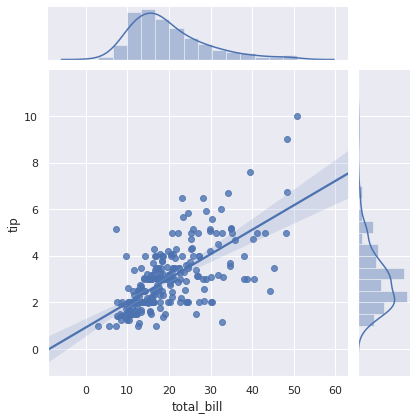

In [261]:
sb.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

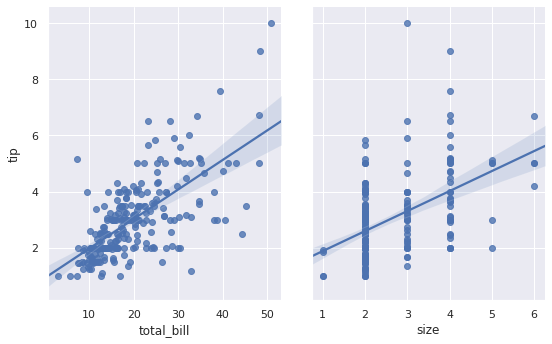

In [262]:
sb.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

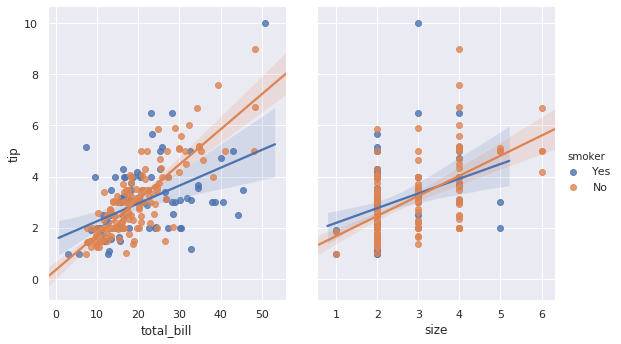

In [263]:
sb.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

### Building Structured multi-plot grids

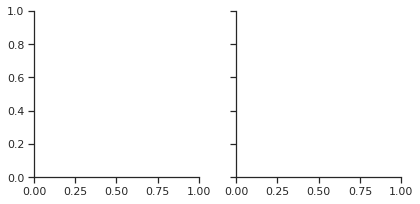

In [265]:
sb.set(style="ticks")

g = sb.FacetGrid(tips, col="time")

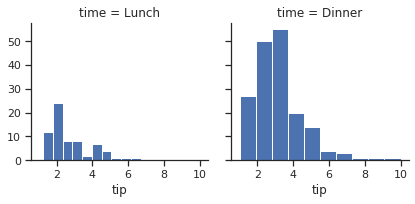

In [269]:
g = sb.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");


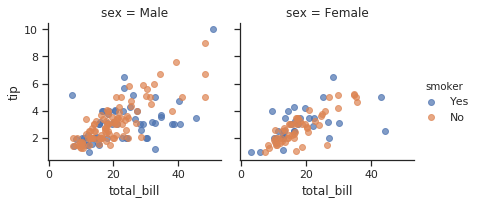

In [270]:
g = sb.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

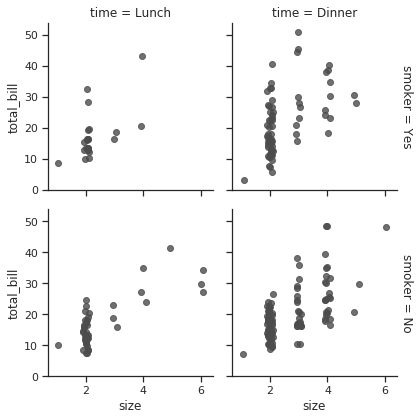

In [272]:
g = sb.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sb.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

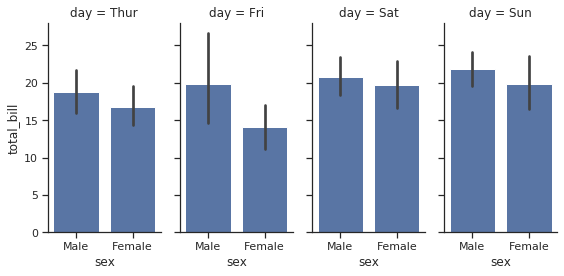

In [273]:
g = sb.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sb.barplot, "sex", "total_bill");

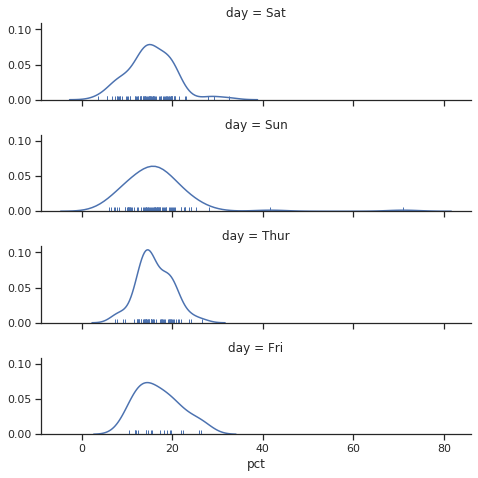

In [279]:
tips["pct"] = 100* tips["tip"]/tips["total_bill"]
ordered_days = tips.day.value_counts().index
g = sb.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sb.distplot, "pct", hist=False, rug=True);

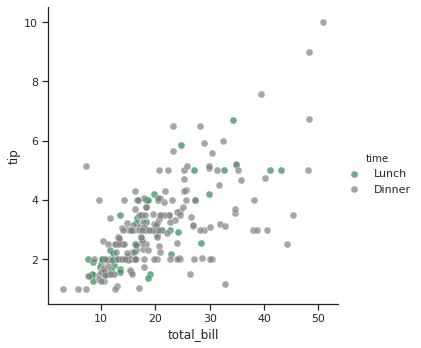

In [280]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sb.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

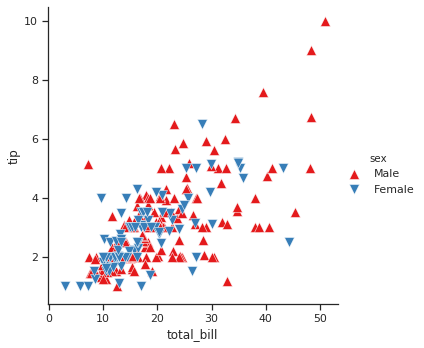

In [281]:
g = sb.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

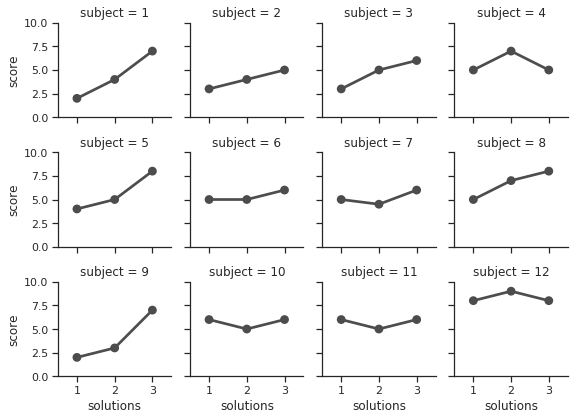

In [282]:
attend = sb.load_dataset("attention").query("subject <= 12")
g = sb.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

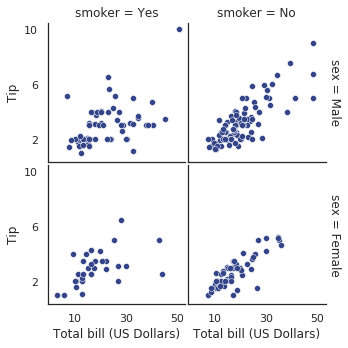

In [283]:
with sb.axes_style("white"):
    g = sb.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

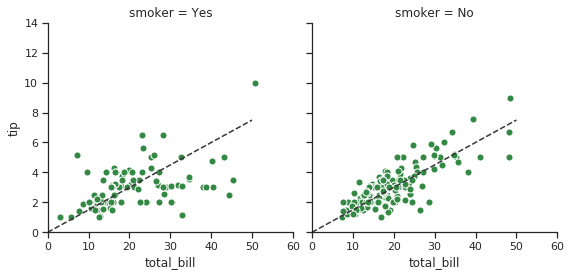

In [285]:
g = sb.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .15 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

## Using custom function in map
Note the custom function must follow following rules
    1. It must plot onto the currently active matplotlib Axes
    2. It must accept the data that it plots in the positional argument
    3. It must be able to accept color and label. In most cases it is easy to catch generic dictonary of 
    **kwargs

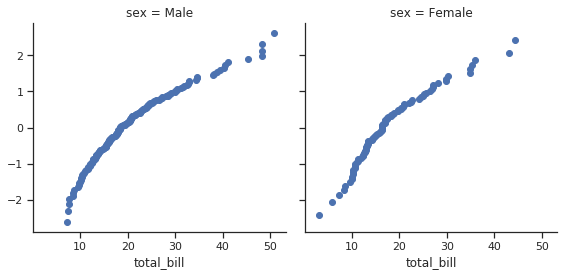

In [286]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sb.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill");

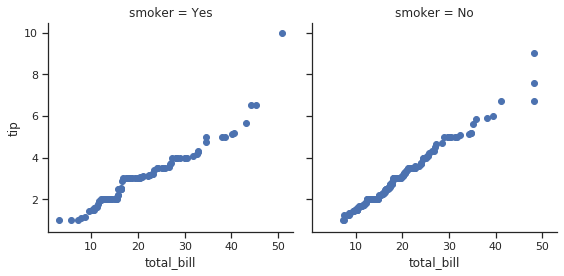

In [288]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sb.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip");

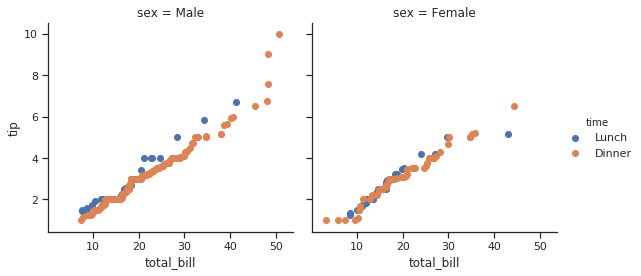

In [289]:
g = sb.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

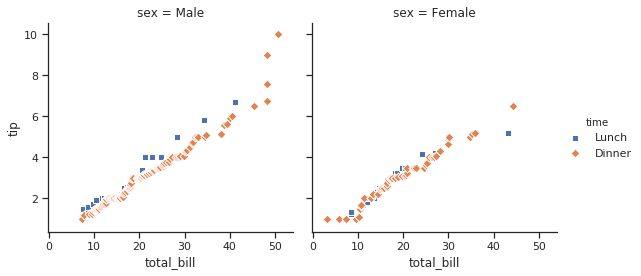

In [290]:
g = sb.FacetGrid(tips, hue="time", col="sex", height=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

## Plotting pairwise data relationships

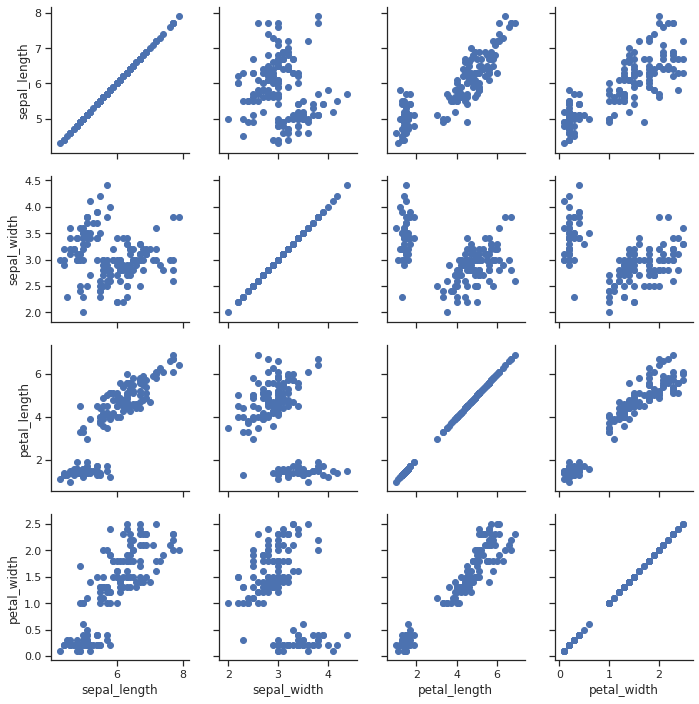

In [293]:
iris = sb.load_dataset("iris")
g = sb.PairGrid(iris)
g.map(plt.scatter);

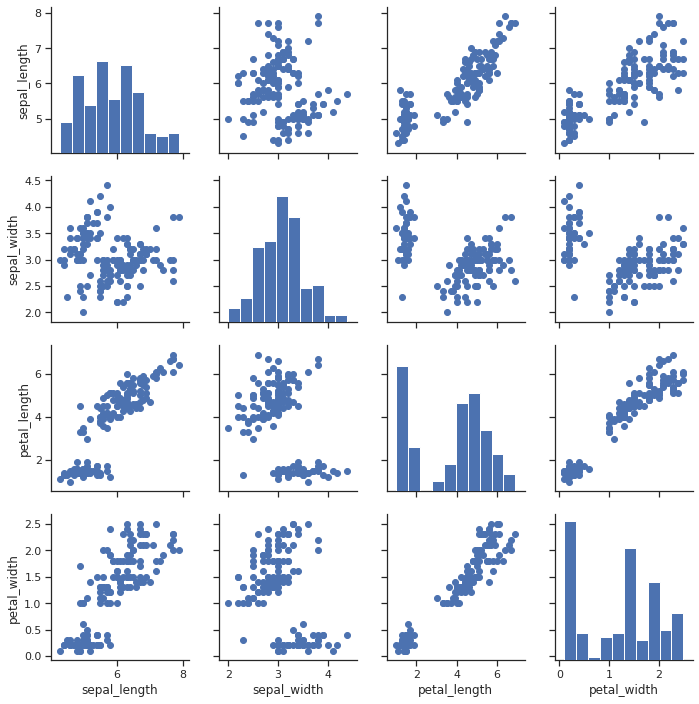

In [294]:
g = sb.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

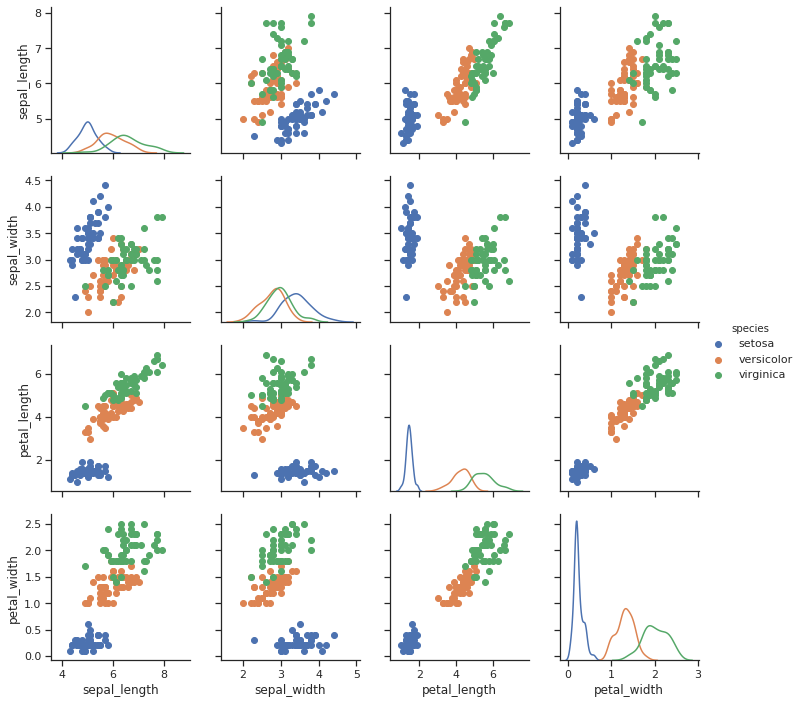

In [303]:
g = sb.PairGrid(iris, hue="species")
g.map_diag(sb.kdeplot)
g.map_offdiag(plt.scatter)
g.add_legend();

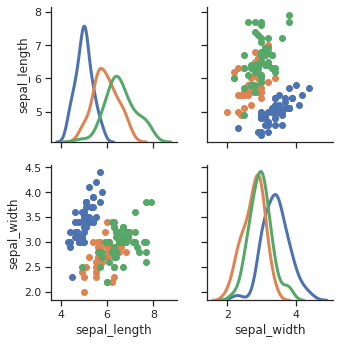

In [308]:
g = sb.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map_offdiag(plt.scatter);
g.map_diag(sns.kdeplot, lw=3, legend=False);

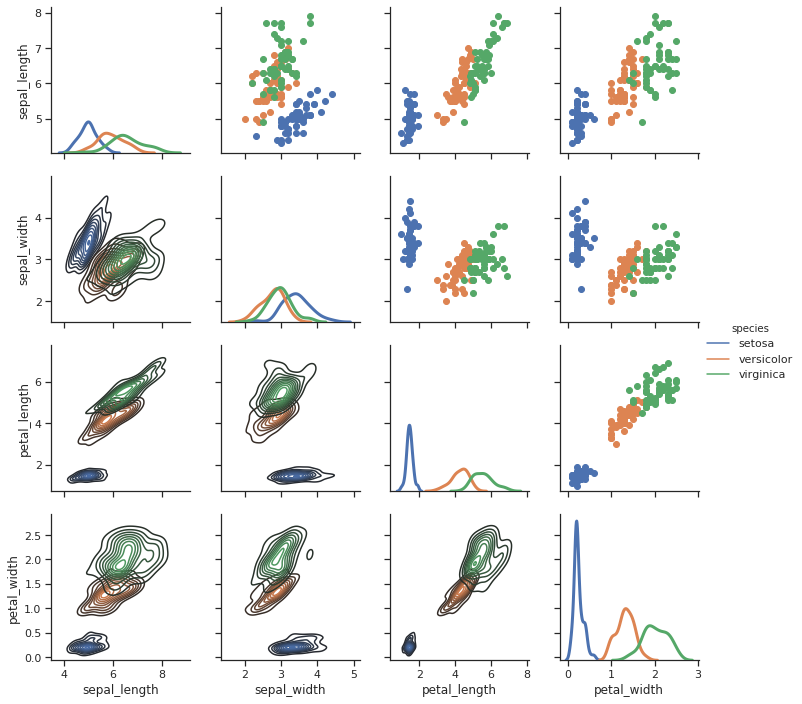

In [317]:
g = sb.PairGrid(iris, hue="species")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);
g.add_legend()

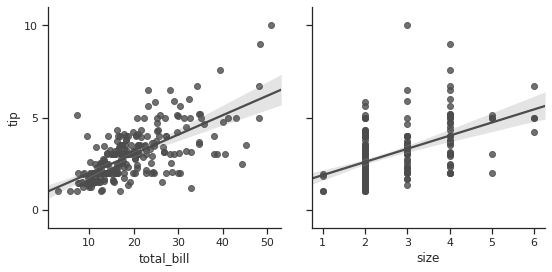

In [318]:
g = sb.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sb.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

## Controling Figure Aesthetics

In [319]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

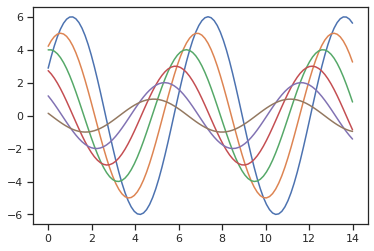

In [320]:
sinplot()

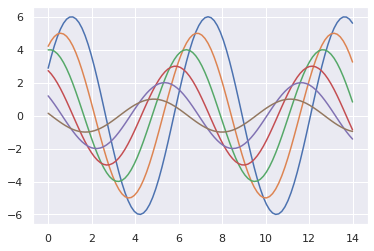

In [321]:
sb.set()
sinplot()

Seaborn figure styles
There are five seaborn themes:
    1. darkgrid
    2. whitegrid
    3. dark
    4. white
    5. ticks
  


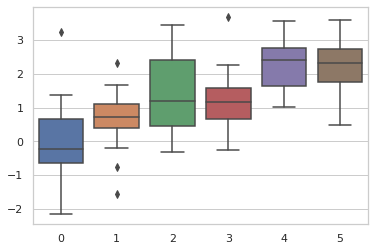

In [323]:
sb.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sb.boxplot(data=data);

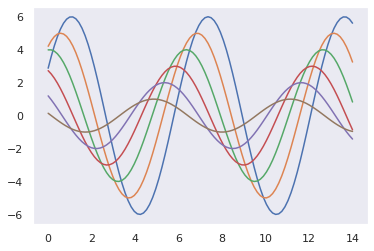

In [329]:
sb.set_style("dark")
sinplot()

Removing ases spines

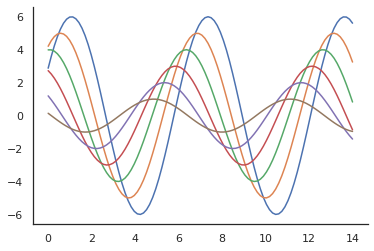

In [333]:
sb.set_style("white")
sinplot()
sb.despine()

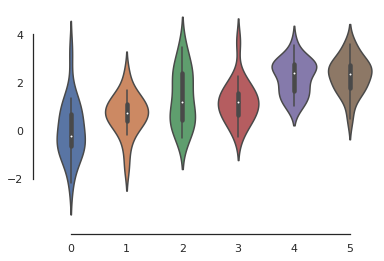

In [334]:
f, ax = plt.subplots()
sb.violinplot(data=data)
sb.despine(offset=10, trim=True);

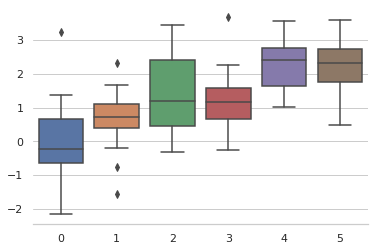

In [337]:
sb.set_style("whitegrid")
sb.boxplot(data=data, palette="deep")
sb.despine(left=True)

In [338]:
sb.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

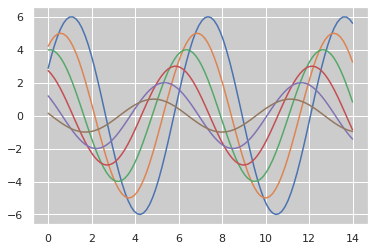

In [344]:
sb.set_style("darkgrid", {"axes.facecolor": "0.8"})
sinplot()


Scaling Plot element
There 

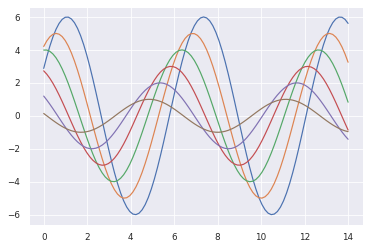

In [346]:
sb.set()
sb.set_context("paper")
sinplot()

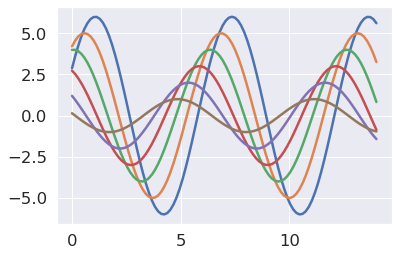

In [347]:
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

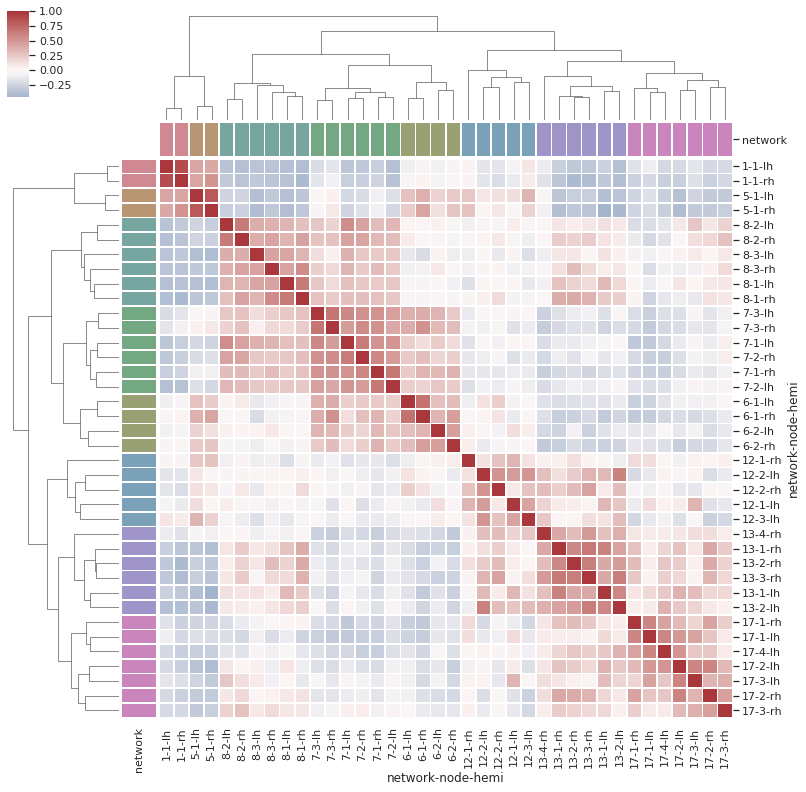

In [348]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))